# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [60]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import seaborn as sns

import nsfg
import first

sns.set_style()

Given a list of values, there are several ways to count the frequency of each value.

In [61]:
t = [1, 2, 2, 3, 5]


c_t = Counter(t)

c_t = OrderedDict(c_t)
c_t


OrderedDict([(1, 1), (2, 2), (3, 1), (5, 1)])

You can use a `Counter` (which is a dictionary with additional methods):
also `OrderdDict` is a great way to store data as well

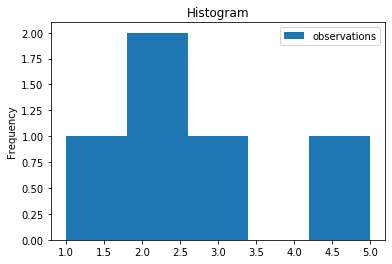

In [62]:
# lets see a quick histogram of the data
df = pd.DataFrame(t, columns=['observations'])

df.plot.hist(bins=5)
plt.title('Histogram')
plt.show()

You can use a Python dictionary:

In [63]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [64]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Items` method:

In [65]:
for item in c_t:
     print(item, c_t[item])

1 1
2 2
3 1
5 1


In [66]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
print(live.columns.values)

['caseid' 'pregordr' 'howpreg_n' 'howpreg_p' 'moscurrp' 'nowprgdk'
 'pregend1' 'pregend2' 'nbrnaliv' 'multbrth' 'cmotpreg' 'prgoutcome'
 'cmprgend' 'flgdkmo1' 'cmprgbeg' 'ageatend' 'hpageend' 'gestasun_m'
 'gestasun_w' 'wksgest' 'mosgest' 'dk1gest' 'dk2gest' 'dk3gest'
 'bpa_bdscheck1' 'bpa_bdscheck2' 'bpa_bdscheck3' 'babysex' 'birthwgt_lb'
 'birthwgt_oz' 'lobthwgt' 'babysex2' 'birthwgt_lb2' 'birthwgt_oz2'
 'lobthwgt2' 'babysex3' 'birthwgt_lb3' 'birthwgt_oz3' 'lobthwgt3'
 'cmbabdob' 'kidage' 'hpagelb' 'birthplc' 'paybirth1' 'paybirth2'
 'paybirth3' 'knewpreg' 'trimestr' 'ltrimest' 'priorsmk' 'postsmks'
 'npostsmk' 'getprena' 'bgnprena' 'pnctrim' 'lpnctri' 'workpreg'
 'workborn' 'didwork' 'matweeks' 'weeksdk' 'matleave' 'matchfound'
 'livehere' 'alivenow' 'cmkidied' 'cmkidlft' 'lastage' 'wherenow'
 'legagree' 'parenend' 'anynurse' 'fedsolid' 'frsteatd_n' 'frsteatd_p'
 'frsteatd' 'quitnurs' 'ageqtnur_n' 'ageqtnur_p' 'ageqtnur' 'matchfound2'
 'livehere2' 'alivenow2' 'cmkidied2' 'cmkidlft2'

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

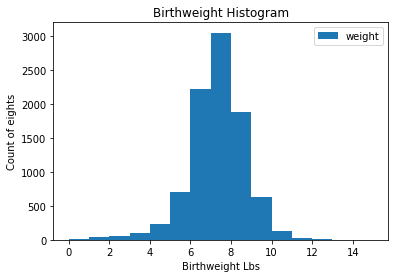

In [68]:
plt.hist(x=live.birthwgt_lb, bins=15, label='weight')
plt.ylabel('Count of eights')
plt.xlabel('Birthweight Lbs')
plt.title('Birthweight Histogram')
plt.legend()
plt.show()

Before plotting the ages, I'll apply `floor` to round down:

In [69]:
ages = np.floor(live.agepreg)

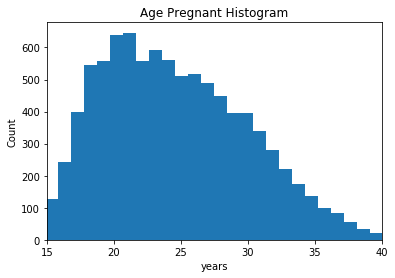

In [84]:
plt.hist(x=ages, label='agepreg', bins=35)
plt.xlim((15, 40)) 

plt.xlabel('years')
plt.ylabel('Count')
plt.title('Age Pregnant Histogram')
plt.show()

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

In [88]:
live.prglngth.describe()

count    9148.000000
mean       38.560560
std         2.702344
min         0.000000
25%        39.000000
50%        39.000000
75%        39.000000
max        50.000000
Name: prglngth, dtype: float64

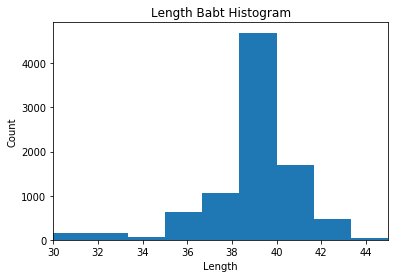

In [98]:
# Solution goes here
plt.clf()
plt.hist(x=live.prglngth, label='pregLentgh', bins=30)
plt.xlim((30, 45)) 

plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length Babt Histogram')
plt.show()


`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [119]:
# Solution goes here
group_len = pd.DataFrame(live.groupby(by='prglngth')['caseid'].count())
group_len.columns = ['count']
group_len.tail(10)

,count
prglngth,
40,1116
41,587
42,328
43,148
44,46
45,10
46,1
47,1
48,7


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

/Users/bkeyes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


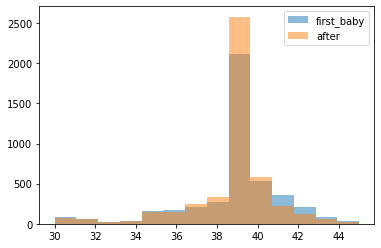

In [141]:
live['first_baby'] = 'Yes'
not_first = live.birthord != 1
live.loc[not_first,'first_baby'] = "No"

bins = np.linspace(30, 45, 15)

plt.hist(live.loc[live['first_baby'] == 'Yes', 'prglngth'], bins, alpha=0.5, label='first_baby')
plt.hist(live.loc[live['first_baby'] == 'No', 'prglngth'], bins, alpha=0.5, label='after')
plt.legend(loc='upper right')
plt.show()

We can use `width` and `align` to plot two histograms side-by-side.

`Series` provides methods to compute summary statistics:

In [142]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [143]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [145]:
# Solution goes here
var **0.5  == std

True

Here's are the mean pregnancy lengths for first babies and others:

In [158]:
groupd_desc = live.groupby(by=['first_baby'])['prglngth' ].describe().T
groupd_desc['diff'] = groupd_desc['Yes'] - groupd_desc['No']
groupd_desc 

first_baby,No,Yes,diff
count,4735.000000,4413.000000,-322.000000
mean,38.522914,38.600952,0.078037
std,2.615852,2.791901,0.176049
min,4.000000,0.000000,-4.000000
25%,39.000000,39.000000,0.000000
50%,39.000000,39.000000,0.000000
75%,39.000000,40.000000,1.000000
max,50.000000,48.000000,-2.000000


And here's the difference (in weeks):

In [160]:
groupd_desc[groupd_desc.index =='mean']

first_baby,No,Yes,diff
mean,38.522914,38.600952,0.078037


This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [161]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [162]:
# Solution goes here
CohenEffectSize(live.loc[live['first_baby']=='Yes','prglngth'], live.loc[live['first_baby']=='No','prglngth'])

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [29]:
# Solution goes here

In [30]:
# Solution goes here

For the next few exercises, we'll load the respondent file:

In [31]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [32]:
# Solution goes here

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [33]:
# Solution goes here

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [34]:
# Solution goes here

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

In [35]:
# Solution goes here

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [36]:
# Solution goes here

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

In [37]:
# Solution goes here

Find the largest parities for high income respondents.

In [38]:
# Solution goes here

Compare the mean <tt>parity</tt> for high income respondents and others.

In [39]:
# Solution goes here

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [40]:
# Solution goes here